In [ ]:
!pip install nibabel

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
folder_path_fully='/content/gdrive/My Drive/Brats2018/HGG'

#folder_path_under='/content/gdrive/My Drive/Dataset_MRI/Under'

In [ ]:
import os
from scipy.ndimage import zoom  # For resizing
subfolders=[os.path.join(folder_path_fully,folder) for folder in os.listdir(folder_path_fully) ]

print(subfolders)


['/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_20_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_10_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_17_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_18_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_14_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_21_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_19_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_12_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_11_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_13_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_5_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_3_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_4_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_2_1', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_7_1']


In [ ]:
#print(subfolders[0]+'_flair.nii')

def create_file_paths(subfolder):
    folder=subfolder.split("/", -1)[-1]
    flair=subfolder.split("/", -1)[-1]+'_flair.nii'
    seg=subfolder.split("/", -1)[-1]+'_seg.nii'
    t1=subfolder.split("/", -1)[-1]+'_t1.nii'
    t1ce=subfolder.split("/", -1)[-1]+'_t1ce.nii'
    t2=subfolder.split("/", -1)[-1]+'_t2.nii'
    flair=os.path.join(subfolder,flair)
    seg=os.path.join(subfolder,seg)
    t1=os.path.join(subfolder,t1)
    t1ce=os.path.join(subfolder,t1ce)
    t2=os.path.join(subfolder,t2)
    return [flair,seg,t1,t1ce,t2]
filepaths=[create_file_paths(subfolder)  for subfolder in subfolders]
print(filepaths[0:2])

#print(os.path.join(subfolders[0],filename))

[['/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_20_1/Brats18_2013_20_1_flair.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_20_1/Brats18_2013_20_1_seg.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_20_1/Brats18_2013_20_1_t1.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_20_1/Brats18_2013_20_1_t1ce.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_20_1/Brats18_2013_20_1_t2.nii'], ['/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii', '/content/gdrive/My Drive/Brats2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii']]


In [ ]:
def read_paths(filepaths):
  
  flair_list= [img_subpath[0] for img_subpath in filepaths]
  seg_list=[img_subpath[1] for img_subpath in filepaths]
  t1_list=[img_subpath[2] for img_subpath in filepaths]
  t1ce_list=[img_subpath[3] for img_subpath in filepaths]
  t2_list=[img_subpath[4] for img_subpath in filepaths]
  flair=map(lambda x: np.asarray(nib.load(x).get_fdata()), flair_list)
  seg=map(lambda x: np.asarray(nib.load(x).get_fdata()), seg_list)
  t1=map(lambda x: np.asarray(nib.load(x).get_fdata()), t1_list)
  t1ce=map(lambda x: np.asarray(nib.load(x).get_fdata()), t1ce_list)
  t2=map(lambda x: np.asarray(nib.load(x).get_fdata()), t2_list)
  flair=np.asarray(list(flair))
  seg=np.asarray(list(seg))
  t1=np.asarray(list(t1))
  t1ce=np.asarray(list(t1ce))
  t2=np.asarray(list(t2))
  return flair,seg,t1,t1ce,t2

In [ ]:
import nibabel as nib
import numpy as np
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    #min_val = np.min(x)
    max_val = np.max(x)
    x = x / max_val
    return x
def read_imgs(path):
    img_paths=[os.path.join(path,img_folder) for img_folder in os.listdir(path) ]
    imgs=map(lambda x: np.asarray(nib.load(x).get_fdata()), paths)
    return imgs

def split_imgs(subfolders):
    #imgs=(normalize(np.asarray(list(read_imgs(sub_subfolders)))) for sub_subfolders in subfolders)
    imgs=((np.asarray(list(read_imgs(sub_subfolders)))) for sub_subfolders in subfolders)
    imgs=np.asarray(list(imgs))
    return imgs
'''
imgs=split_imgs(subfolders)

#flair=imgs[:,0:1,:,:,30:120]
#seg=imgs[:,1:2,:,:,30:120]
seg=imgs[:,0:1,:,:,30:120]
flair=imgs[:,1:2,:,:,30:120]
t1=imgs[:,2:3,:,:,30:120]
t1ce=imgs[:,3:4,:,:,30:120]
t2=imgs[:,4:5,:,:,30:120]
print(flair.shape)
'''
flair,seg,t1,t1ce,t2=read_paths(filepaths)

In [ ]:

flair=flair[:,:,:,30:120]
seg=seg[:,:,:,30:120]
t1=t1[:,:,:,30:120]
t1ce=t1ce[:,:,:,30:120]
t2=t2[:,:,:,30:120]
print(flair.shape)
#flair2=np.concatenate((flair,t1,t1ce,t2), axis=1)
#print(flair2.shape)


(15, 240, 240, 90)


In [ ]:
flair=np.expand_dims(flair, axis=1)
t1=np.expand_dims(t1, axis=1)
t1ce=np.expand_dims(t1ce, axis=1)
t2=np.expand_dims(t2, axis=1)
seg=np.expand_dims(seg, axis=1)
flair2=np.concatenate((flair,t1,t1ce,t2), axis=1)
print(flair2.shape)

(15, 4, 240, 240, 90)


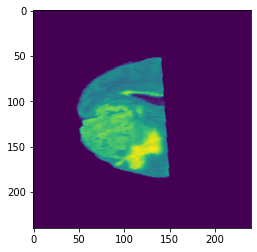

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.squeeze(flair[0,:,:,:,70]))

In [ ]:
print(np.max(flair[0]))
print(np.max(seg[0]))
print(np.max(t1[0]))
print(np.max(t2[0]))

607.0
4.0
734.0
1032.0


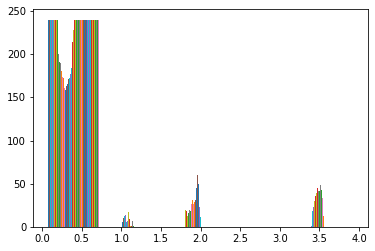

In [ ]:
import matplotlib.pyplot as plt

#plt.hist(normalize(np.squeeze(seg[0,:,:,:,10])),bins=5)
plt.hist(np.squeeze(seg[2,:,:,:,60]),bins=5)
plt.show()

In [ ]:
#seg_test=normalize(np.squeeze(seg[0,:,:,:,20].copy()))
#plt.imshow(seg_test)

In [ ]:
#seg_test1=np.where((seg_test>0.2)&(seg_test<0.4), seg_test, 0)
#plt.imshow(seg_test1)
##1.Necrosis------0.2 to 0.4
##2.Edema---------0.4 to 0.6
##3.Non-Enhancing tumor----0.6 to 0.8
##4.Enhancing tumor--------0.8 to 1.0
##5. Everything else------0 t0 0.2
def convert_onech_tomultichannelgt(seg_img):
  final_gt=[]
  seg_test1=seg_img.copy()
  seg_test2=seg_img.copy()
  seg_test3=seg_img.copy()
  seg_test4=seg_img.copy()
  
  seg_test1=np.where((seg_test1>0.0)&(seg_test1<=1.0), 1, 0)
  seg_test2=np.where((seg_test2>1.0)&(seg_test2<=2.0), 1, 0)
  seg_test3=np.where((seg_test3>2.0)&(seg_test3<=3.0), 1, 0)
  seg_test4=np.where((seg_test4>3.0)&(seg_test4<=4.0), 1, 0)
  seg_test2_3=seg_test2+seg_test3
  seg_list=[seg_test1,seg_test2_3,seg_test4]
  for segment in seg_list:
    final_gt.append(segment)
  return np.asarray(final_gt)

  


In [ ]:
flair2=np.asarray(list(map(lambda x: normalize(x), flair2))) #### change

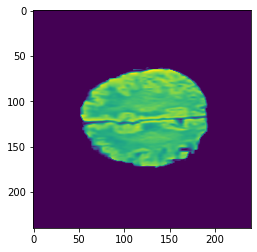

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.squeeze(flair2[1,0,:,:,80]))

In [ ]:
flair3=[]
for i in range(flair2.shape[-1]):
    flair3.append(flair2[...,i])
flair3=np.asarray(flair3)
print(flair3.shape)
flair3=flair3.reshape(flair3.shape[0]*flair3.shape[1],flair3.shape[2],flair3.shape[3],flair3.shape[4])
print(flair3.shape)

(90, 15, 4, 240, 240)
(1350, 4, 240, 240)


In [ ]:
def normalise_data_img(data):
  final_seg_inp=[]
  #seg_inp=(np.asarray(list(normalize(segs))) for segment in data for segs in segment )
  for segment in data:
    #for segs in segment:
       print('sement',segment.shape)
       segs=np.asarray(list(map(lambda x: normalize(x), segment)))
       final_seg_inp.append(segs)
  seg_inp=np.asarray(final_seg_inp)
  #print('seg_inp',seg_inp.shape)
  #for segmen in range(int(len(seg_inp)/4)):
  #  final_seg_inp.append(np.asarray(seg_inp[0:4*segmen,:,:]))
  return seg_inp


In [ ]:
def standard_scaling(pixels):
    mean, std = pixels.mean(), pixels.std()
    print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
    # global standardization of pixels
    pixels = (pixels - mean) / std
    return pixels
def standardise_data_img(data):
  final_seg_inp=[]
  #seg_inp=(np.asarray(list(normalize(segs))) for segment in data for segs in segment )
  for segment in data:
    #for segs in segment:
       print('sement',segment.shape)
       segs=np.asarray(list(map(lambda x: standard_scaling(x), segment)))
       final_seg_inp.append(segs)
  seg_inp=np.asarray(final_seg_inp)
  #print('seg_inp',seg_inp.shape)
  #for segmen in range(int(len(seg_inp)/4)):
  #  final_seg_inp.append(np.asarray(seg_inp[0:4*segmen,:,:]))
  return seg_inp



In [ ]:
#flair3=normalise_data_img(flair3)
#flair3=standardise_data_img(flair3)
#flair3=normalise_data_img(flair3)
print(flair3.shape)

(1350, 4, 240, 240)


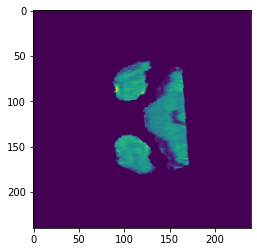

In [ ]:
plt.imshow(flair3[60][0])

In [ ]:
seg3=[]
for c in range(seg.shape[-1]):
    seg3.append(seg[...,c])
seg3=np.asarray(seg3)
print(seg3.shape)
seg3=seg3.reshape(seg3.shape[0]*seg3.shape[1],seg3.shape[2],seg3.shape[3],seg3.shape[4])
print(seg3.shape)

(90, 15, 1, 240, 240)
(1350, 1, 240, 240)


In [ ]:

def remove_blank_images(seg5,flair5):
  fseg=[]
  fflair=[]
  for index,eseg in enumerate(seg5,0):
    #print(index)
    #print(eseg.shape)
    if (np.mean(eseg)>0):
      fseg.append(eseg)
      fflair.append(flair5[index])
  fseg=np.asarray(fseg)
  fflair=np.asarray(fflair)
  return fflair,fseg
flair3,seg3=remove_blank_images(seg3,flair3)
print(seg3.shape)
print(flair3.shape)





(932, 1, 240, 240)
(932, 4, 240, 240)


In [ ]:
#gt=preprocess_label(np.squeeze(seg3[0]), out_shape=None, mode='nearest')
#print(gt.shape)  
#seg3=standardise_data_img(seg3)
#seg3=np.asarray(list(map(lambda x: normalize(x), seg3)))
#seg_labels=((np.asarray(list(convert_onech_tomultichannelgt(normalize(np.squeeze(segment)))))) for segment in seg3)
seg_labels=((np.asarray(list(convert_onech_tomultichannelgt(np.squeeze(segment))))) for segment in seg3)
seg_labels=np.asarray(list(seg_labels))
#print(seg_labels.shape)
#seg_labels=standardise_data_img(seg_labels)

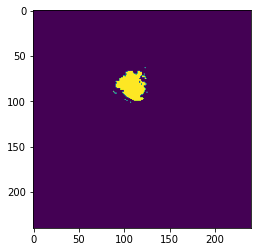

In [ ]:
seg_labels=np.squeeze(seg_labels)
plt.imshow(np.squeeze(seg_labels[150,0,:,:]))

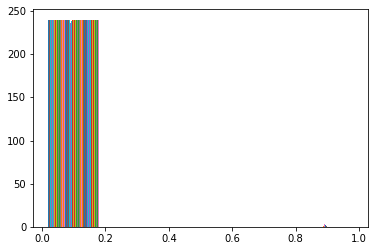

In [ ]:
plt.hist(np.squeeze(seg_labels[2,1,:,:]),bins=5)
plt.show()

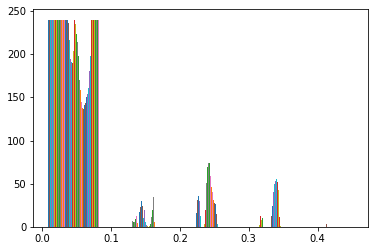

In [ ]:
plt.hist(np.squeeze(flair3[0,1,:,:]),bins=5)
plt.show()

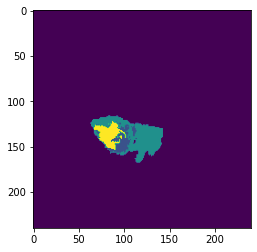

In [ ]:
plt.imshow(np.squeeze(seg3[900]))
#plt.hist(np.squeeze(seg3[1010]),256

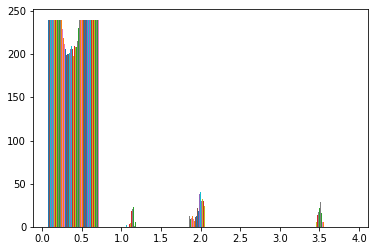

In [ ]:
plt.hist(np.squeeze(seg3[900]),5)
plt.show()

In [ ]:
#seg2=seg.reshape(seg.shape[0]*seg.shape[4],seg.shape[1],seg.shape[2],seg.shape[3])
#print(seg2.shape)

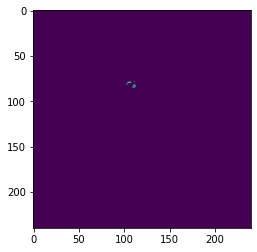

In [ ]:
plt.imshow(np.squeeze(seg3[1]))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#import torch_geometric.nn as pyg_nn
#import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

#import networkx as nx
import numpy as np
import torch
import torch.optim as optim
#from torchvision.datasets import MNIST
import multiprocessing

import numpy as np
import scipy as sp
from skimage.segmentation import slic, mark_boundaries
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
NP_TORCH_FLOAT_DTYPE = np.float32
NP_TORCH_LONG_DTYPE = np.int64


In [ ]:
import torch
#import networkx as nx

%matplotlib inline

In [ ]:
class Unet(torch.nn.Module):
  def __init__(self):
        super(Unet, self).__init__()
        self.conv1 = nn.Conv2d(4, 32, 3, stride=1,padding=1)
        self.maxpool1=nn.MaxPool2d(3, stride=2,padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=1,padding=1)
        self.maxpool2=nn.MaxPool2d(3, stride=2,padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=1,padding=1)
        self.maxpool3=nn.MaxPool2d(3, stride=2,padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, stride=1,padding=1)
        self.maxpool4=nn.MaxPool2d(3, stride=2,padding=1)
        self.conv5 = nn.Conv2d(256, 1024, 3, stride=1,padding=1)




        #############################################################
        self.conv6 = nn.Conv2d(1024, 256, 3, stride=1,padding=1)
        self.upsample1=torch.nn.Upsample(scale_factor=2, mode='nearest')
        self.conv7 = nn.Conv2d(256, 128, 3, stride=1,padding=1)
        self.upsample2=torch.nn.Upsample(scale_factor=2, mode='nearest')
        self.conv8 = nn.Conv2d(128, 64, 3, stride=1,padding=1)
        self.upsample3=torch.nn.Upsample(scale_factor=2, mode='nearest')
        self.conv9 = nn.Conv2d(64, 32, 3, stride=1,padding=1)
        self.upsample4=torch.nn.Upsample(scale_factor=2, mode='nearest')
        self.conv10 = nn.Conv2d(32, 3, 3, stride=1,padding=1)

        self.conv_cat1=nn.Conv2d(512, 256, 3, stride=1,padding=1)
        self.conv_cat2=nn.Conv2d(256, 128, 3, stride=1,padding=1)
        self.conv_cat3=nn.Conv2d(128, 64, 3, stride=1,padding=1)
        self.conv_cat4=nn.Conv2d(64, 32, 3, stride=1,padding=1)
        

  def forward(self, x):
        x1 = F.leaky_relu((self.conv1(x)),0.2)
        x11=self.maxpool1(x1)
        x2 = F.leaky_relu((self.conv2(x11)),0.2)
        x21=self.maxpool2(x2)
        x3 = F.leaky_relu((self.conv3(x21)),0.2)
        x31=self.maxpool3(x3)
        x4 = F.leaky_relu((self.conv4(x31)),0.2)
        x41=self.maxpool4(x4)
        x5 = F.leaky_relu(self.conv5(x41),0.2)
        #####################################################################
        x6 = F.leaky_relu((self.conv6(x5)),0.2)
        x6=torch.cat([x41, x6], dim=1)
        x61=self.upsample1(x6)
        x6=F.leaky_relu(self.conv_cat1(x61))
        #print('x6',x6.size())

        
        x7 = F.leaky_relu(self.conv7(x6),0.2)
        x7=torch.cat([x31, x7], dim=1)
        x7=self.upsample2(x7)
        x7=F.leaky_relu(self.conv_cat2(x7))
        #print('x7',x7.size())


        x8 = F.leaky_relu(self.conv8(x7),0.2)
        x8=torch.cat([x21, x8], dim=1)
        x8=self.upsample3(x8)
        x8=F.leaky_relu(self.conv_cat3(x8))
        #print('x8',x8.size())

        x9 = F.leaky_relu(self.conv9(x8),0.2)
        x9=torch.cat([x11, x9], dim=1)
        x9=self.upsample4(x9)
        x9=F.leaky_relu(self.conv_cat4(x9))
        #print('x9',x9.size())
        x10 = torch.sigmoid(self.conv10(x9))
        
        
               
        return x10





In [ ]:
def dice_loss(input, target):
    """ This is a normal dice loss function for binary segmentation.
    Args:
        input: output of the segmentation network
        target: ground truth label
    Returns:
        dice score
    """
    smooth = 1
    # input = F.softmax(input, dim=1)
    # input = torch.sigmoid(input) #for binary
    iflat = input.view(-1)
    tflat = target.view(-1)
    intersection = (iflat * tflat).sum()
    union = iflat.sum() + tflat.sum()
    dice_score = (2.*intersection + smooth)/(union + smooth)
    return 1-dice_score

In [ ]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    #min_val = np.min(x)
    max_val = np.max(x)
    x = x / max_val
    return x








from torch.utils.data import TensorDataset, DataLoader
   




tensor_x = torch.Tensor(flair3) # transform to torch tensor
tensor_y = torch.Tensor(seg_labels)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset,batch_size=1, shuffle=True) # create your dataloader



model = Unet()





##############train and test#############
#for epoch in range(1, 1000):
    
#    img,loss,x,out=train(epoch,imgs)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" )



model.cuda()

#params=[model.parameters()]+[cnnfeaturemap.parameters()]+[encoder.parameters()]+[decoder.parameters()]
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
trainingloss=[]
testloss=[]
for epoch in range(50):
    # Training
    
    for local_batch, local_labels in my_dataloader:
        # Transfer to GPU
        optimizer.zero_grad()
        local_batch, local_labels = local_batch.cuda(), local_labels.cuda()
        #print(local_batch.size())
        
        local_batch=torch.reshape(local_batch,(local_batch.shape[0],4,local_batch.shape[2],local_batch.shape[3]))
        i = model(local_batch)
        
        
        #loss=torch.nn.BCELoss()(i,local_labels)
        loss=dice_loss(i,local_labels)
       
        loss.backward()
        optimizer.step()
    
    trainingloss.append(loss.item())
    print('Epoch: {:03d}, Loss: {:.4f}'.format(epoch,loss))




Epoch: 000, Loss: 0.9996
Epoch: 001, Loss: 0.9996
Epoch: 002, Loss: 0.9997
Epoch: 003, Loss: 0.9500
Epoch: 004, Loss: 0.9995
Epoch: 005, Loss: 0.9986
Epoch: 006, Loss: 0.9998
Epoch: 007, Loss: 0.9992
Epoch: 008, Loss: 0.9995
Epoch: 009, Loss: 0.9994
Epoch: 010, Loss: 0.9994
Epoch: 011, Loss: 0.9992
Epoch: 012, Loss: 0.9994
Epoch: 013, Loss: 0.9984
Epoch: 014, Loss: 0.9993
Epoch: 015, Loss: 0.9971
Epoch: 016, Loss: 0.9998
Epoch: 017, Loss: 0.9996
Epoch: 018, Loss: 0.9965
Epoch: 019, Loss: 0.9997
Epoch: 020, Loss: 0.9991
Epoch: 021, Loss: 0.9998
Epoch: 022, Loss: 0.9997
Epoch: 023, Loss: 0.9925
Epoch: 024, Loss: 0.9997
Epoch: 025, Loss: 0.9997
Epoch: 026, Loss: 0.9988
Epoch: 027, Loss: 0.9994
Epoch: 028, Loss: 0.9993
Epoch: 029, Loss: 0.9986
Epoch: 030, Loss: 0.9991
Epoch: 031, Loss: 0.9991
Epoch: 032, Loss: 0.9998
Epoch: 033, Loss: 0.9995
Epoch: 034, Loss: 0.9998
Epoch: 035, Loss: 0.9994
Epoch: 036, Loss: 0.9995
Epoch: 037, Loss: 0.9991
Epoch: 038, Loss: 0.9994
Epoch: 039, Loss: 0.9997


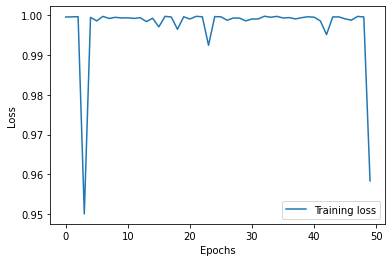

In [ ]:

plt.plot(np.arange(50),trainingloss,label='Training loss')
#plt.show()
#plt.plot(np.arange(50),testloss,label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


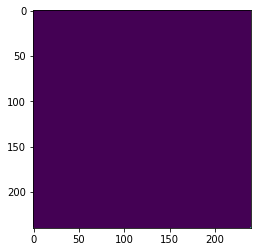

In [ ]:
i=i.squeeze()
i=i.cpu()
plt.imshow(i[0].detach().numpy())

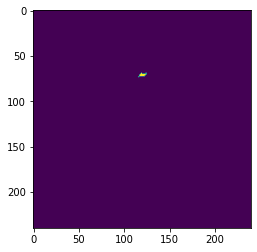

In [ ]:
#local_labels=np.squeeze(local_labels.cpu().numpy())
plt.imshow(local_labels[1])